# MACHINE LEARNING HACKATHON 
# Board Infinity
## Name- Raj Jadhav
### Batch- DS20AUG03

##### Yenapova Medical College wants to understand their patients' data from the gynaecology department. You have been given some infant and mother’s information who have given birth to their baby. Data Analyst have collected the data from hospital. With the help of data science and machine learning, you should understand the relationship ####between mother and their baby. 
 
### 1. Childbirth.xlsx - 
#### -Build an effective data pipeline to  
#### -Clean the data - Perform feature engineering 
#### -Analyze and visualize the data 
#### -Produce a minimum of 10 insights to report to your client. 
 

### Importing The Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_excel('childbirth.xlsx')

In [3]:
df.head()

,BabyId,FirsttimeParent,Crying date,Crying time,Crying seconds,Feeding date,Feeding time,Bottle amount,PumpingDate,PumpingTimePumpingLeftPumpingRight,Pumping Left,PumpingRight,SleepingDate,SleepingTime,SleepingSecond
0,HPT2_NR_16,1,2015-08-05,20:31:47,900.0,2015-08-05,20:31:47,180.0,2015-08-05,20:31:47,40.0,30.0,2015-08-05,20:31:47,5153.979043
1,HPT2_NR_16,1,2015-08-05,23:33:46,600.0,2015-08-05,23:33:46,180.0,2015-08-05,23:33:46,50.0,35.0,2015-08-05,23:33:46,33365.111960
2,HPT2_NR_16,1,2015-08-06,10:20:00,916.0,2015-08-06,10:20:00,180.0,2015-08-06,10:20:00,NaN,NaN,2015-08-06,10:20:00,2100.000000
3,HPT2_NR_16,1,2015-08-06,11:30:00,300.0,2015-08-06,11:30:00,35.0,2015-08-06,11:30:00,NaN,NaN,2015-08-06,11:30:00,1200.000000
4,HPT2_NR_16,1,2015-08-06,12:15:00,600.0,2015-08-06,12:15:00,180.0,2015-08-06,12:15:00,NaN,NaN,2015-08-06,12:15:00,4800.000000


In [4]:
df.rename(columns={'PumpingTimePumpingLeftPumpingRight':'PumpingTime'},inplace=True)

### Analyse The Data

In [5]:
df.head()

,BabyId,FirsttimeParent,Crying date,Crying time,Crying seconds,Feeding date,Feeding time,Bottle amount,PumpingDate,PumpingTime,Pumping Left,PumpingRight,SleepingDate,SleepingTime,SleepingSecond
0,HPT2_NR_16,1,2015-08-05,20:31:47,900.0,2015-08-05,20:31:47,180.0,2015-08-05,20:31:47,40.0,30.0,2015-08-05,20:31:47,5153.979043
1,HPT2_NR_16,1,2015-08-05,23:33:46,600.0,2015-08-05,23:33:46,180.0,2015-08-05,23:33:46,50.0,35.0,2015-08-05,23:33:46,33365.111960
2,HPT2_NR_16,1,2015-08-06,10:20:00,916.0,2015-08-06,10:20:00,180.0,2015-08-06,10:20:00,NaN,NaN,2015-08-06,10:20:00,2100.000000
3,HPT2_NR_16,1,2015-08-06,11:30:00,300.0,2015-08-06,11:30:00,35.0,2015-08-06,11:30:00,NaN,NaN,2015-08-06,11:30:00,1200.000000
4,HPT2_NR_16,1,2015-08-06,12:15:00,600.0,2015-08-06,12:15:00,180.0,2015-08-06,12:15:00,NaN,NaN,2015-08-06,12:15:00,4800.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1773 entries, 0 to 1772
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   BabyId           1773 non-null   object        
 1   FirsttimeParent  1773 non-null   int64         
 2   Crying date      1773 non-null   datetime64[ns]
 3   Crying time      1773 non-null   object        
 4   Crying seconds   73 non-null     float64       
 5   Feeding date     1773 non-null   datetime64[ns]
 6   Feeding time     1773 non-null   object        
 7   Bottle amount    1044 non-null   float64       
 8   PumpingDate      1773 non-null   datetime64[ns]
 9   PumpingTime      1773 non-null   object        
 10  Pumping Left     61 non-null     float64       
 11  PumpingRight     68 non-null     float64       
 12  SleepingDate     1773 non-null   datetime64[ns]
 13  SleepingTime     1773 non-null   object        
 14  SleepingSecond   996 non-null    float64

In [7]:
df.describe()

,FirsttimeParent,Crying seconds,Bottle amount,Pumping Left,PumpingRight,SleepingSecond
count,1773.000000,73.000000,1044.000000,61.000000,68.000000,996.000000
mean,0.840948,1457.206746,127.203065,48.360656,38.014706,9896.331302
std,0.365828,2059.022294,36.557694,42.600091,25.394495,8834.708534
min,0.000000,25.000000,20.000000,0.000000,0.000000,114.492544
25%,1.000000,300.000000,100.000000,25.000000,20.000000,3599.739393
50%,1.000000,900.000000,120.000000,40.000000,32.500000,7701.496468
75%,1.000000,1800.000000,150.000000,55.000000,55.000000,12600.000000
max,1.000000,12600.000000,210.000000,190.000000,155.000000,45000.000000


### Handling The Null Values

In [8]:
df['Crying seconds'].fillna(df['Crying seconds'].median(), inplace=True)
df['Pumping Left'].fillna(df['Pumping Left'].mean(), inplace=True)
df['PumpingRight'].fillna(df['PumpingRight'].mean(), inplace=True)
df['SleepingSecond'].fillna(df['SleepingSecond'].mean(), inplace=True)
df['PumpingRight'].fillna(df['PumpingRight'].median(), inplace=True)
df['Bottle amount'].fillna(df['Bottle amount'].mode()[0], inplace=True)


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1773 entries, 0 to 1772
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   BabyId           1773 non-null   object        
 1   FirsttimeParent  1773 non-null   int64         
 2   Crying date      1773 non-null   datetime64[ns]
 3   Crying time      1773 non-null   object        
 4   Crying seconds   1773 non-null   float64       
 5   Feeding date     1773 non-null   datetime64[ns]
 6   Feeding time     1773 non-null   object        
 7   Bottle amount    1773 non-null   float64       
 8   PumpingDate      1773 non-null   datetime64[ns]
 9   PumpingTime      1773 non-null   object        
 10  Pumping Left     1773 non-null   float64       
 11  PumpingRight     1773 non-null   float64       
 12  SleepingDate     1773 non-null   datetime64[ns]
 13  SleepingTime     1773 non-null   object        
 14  SleepingSecond   1773 non-null   float64

In [10]:
df.describe()

,FirsttimeParent,Crying seconds,Bottle amount,Pumping Left,PumpingRight,SleepingSecond
count,1773.000000,1773.000000,1773.000000,1773.000000,1773.000000,1773.000000
mean,0.840948,922.941959,116.018049,48.360656,38.014706,9896.331302
std,0.365828,429.565536,31.079046,7.838885,4.937932,6620.212164
min,0.000000,25.000000,20.000000,0.000000,0.000000,114.492544
25%,1.000000,900.000000,100.000000,48.360656,38.014706,6600.000000
50%,1.000000,900.000000,100.000000,48.360656,38.014706,9896.331302
75%,1.000000,900.000000,130.000000,48.360656,38.014706,9896.331302
max,1.000000,12600.000000,210.000000,190.000000,155.000000,45000.000000


### Checking & Handling Outliers

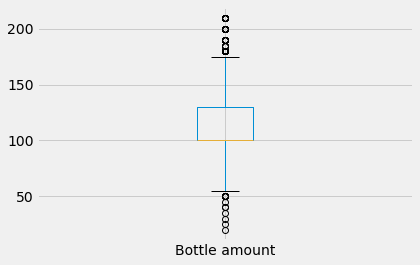

In [11]:
plt.style.use('fivethirtyeight')
df[['Bottle amount']].plot.box();

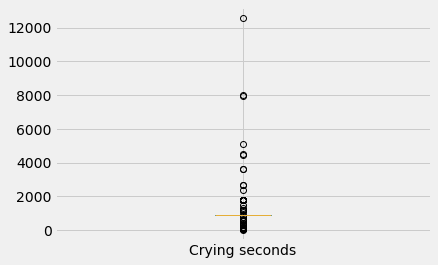

In [12]:
df[['Crying seconds']].plot.box();

In [13]:
df.drop(df[df['Crying seconds']>900].index,inplace=True)

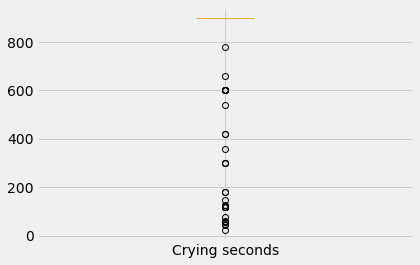

In [14]:
df[['Crying seconds']].plot.box();

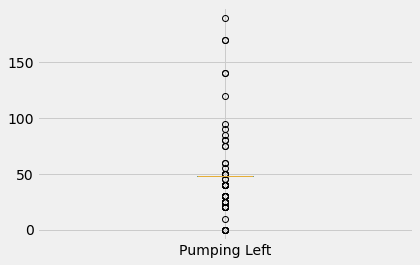

In [15]:
df[['Pumping Left']].plot.box();

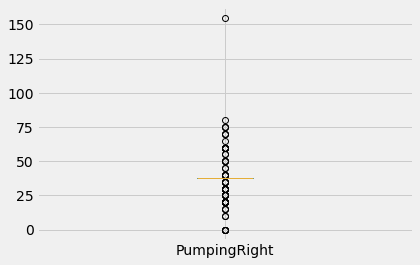

In [16]:
df[['PumpingRight']].plot.box();

In [17]:
df.drop(df[df['PumpingRight']>100].index,inplace=True)

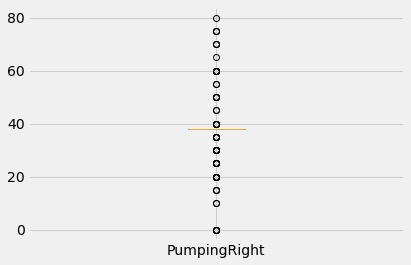

In [18]:
df[['PumpingRight']].plot.box();

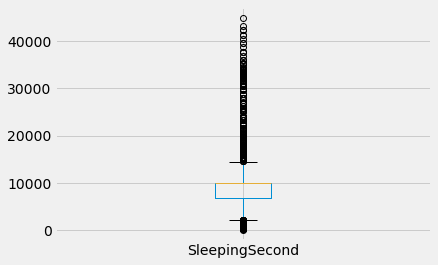

In [19]:
df[['SleepingSecond']].plot.box();

### Correlation

In [20]:
df.corr()

,FirsttimeParent,Crying seconds,Bottle amount,Pumping Left,PumpingRight,SleepingSecond
FirsttimeParent,1.000000,-0.056863,-0.190326,0.001561,-0.007175,-0.039941
Crying seconds,-0.056863,1.000000,-0.047106,0.008141,0.014774,-0.044094
Bottle amount,-0.190326,-0.047106,1.000000,0.002133,0.006609,0.011877
Pumping Left,0.001561,0.008141,0.002133,1.000000,0.299988,-0.024838
PumpingRight,-0.007175,0.014774,0.006609,0.299988,1.000000,-0.032847
SleepingSecond,-0.039941,-0.044094,0.011877,-0.024838,-0.032847,1.000000


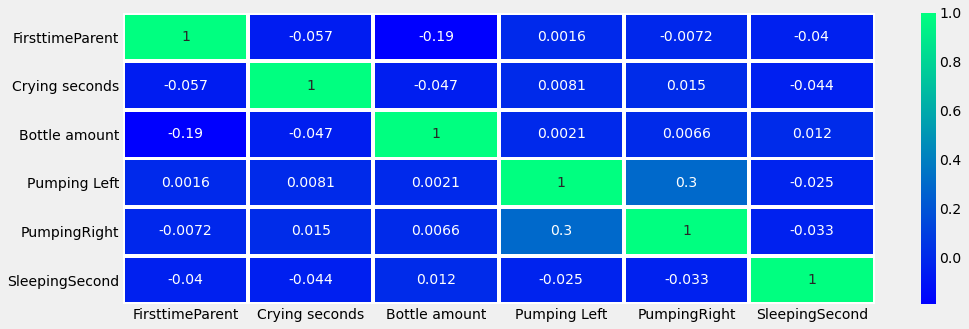

In [21]:
plt.figure(figsize=(15,5))
sns.heatmap(df.corr(),annot=True,linewidths=3,cmap='winter');

##### here we can see there is positive correlation between bottle amount & pumping rate & between bottle amount & Sleeping second.
##### also there is negative relation between bottle amount & crying seconds 

### Battle Amount Vs Crying Seconds

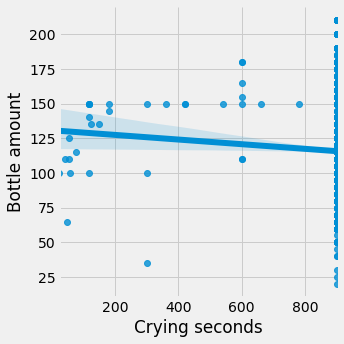

In [22]:
sns.lmplot(x='Crying seconds',y='Bottle amount',data=df);

#### As bottle amount i.e. Milk drank by baby increases crying seconds decreases means more milk drank by baby more time he/she will sleep

### Sleeping Seconds Vs Crying Seconds

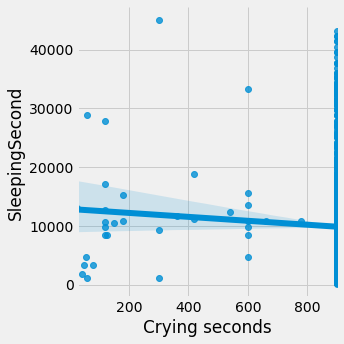

In [23]:
sns.lmplot(x='Crying seconds',y='SleepingSecond',data=df);

#### Sleeping Seconds & Crying Seconds are negatively correlated i.e. more baby cried less he/she will sleep & viceversa

In [24]:
df["Sleeping_year"]=df['SleepingDate'].dt.year
df["Sleeping_month"]=df['SleepingDate'].dt.month
df["Sleeping_day"]=df['SleepingDate'].dt.day

In [25]:
df.head()

,BabyId,FirsttimeParent,Crying date,Crying time,Crying seconds,Feeding date,Feeding time,Bottle amount,PumpingDate,PumpingTime,Pumping Left,PumpingRight,SleepingDate,SleepingTime,SleepingSecond,Sleeping_year,Sleeping_month,Sleeping_day
0,HPT2_NR_16,1,2015-08-05,20:31:47,900.0,2015-08-05,20:31:47,180.0,2015-08-05,20:31:47,40.000000,30.000000,2015-08-05,20:31:47,5153.979043,2015,8,5
1,HPT2_NR_16,1,2015-08-05,23:33:46,600.0,2015-08-05,23:33:46,180.0,2015-08-05,23:33:46,50.000000,35.000000,2015-08-05,23:33:46,33365.111960,2015,8,5
3,HPT2_NR_16,1,2015-08-06,11:30:00,300.0,2015-08-06,11:30:00,35.0,2015-08-06,11:30:00,48.360656,38.014706,2015-08-06,11:30:00,1200.000000,2015,8,6
4,HPT2_NR_16,1,2015-08-06,12:15:00,600.0,2015-08-06,12:15:00,180.0,2015-08-06,12:15:00,48.360656,38.014706,2015-08-06,12:15:00,4800.000000,2015,8,6
5,HPT2_NR_16,1,2015-08-06,17:45:00,900.0,2015-08-06,17:45:00,180.0,2015-08-06,17:45:00,48.360656,38.014706,2015-08-06,17:45:00,2100.000000,2015,8,6


In [26]:
df['Total_pumping_time']=df['Pumping Left']+df['PumpingRight']                       

In [27]:
df.head()

,BabyId,FirsttimeParent,Crying date,Crying time,Crying seconds,Feeding date,Feeding time,Bottle amount,PumpingDate,PumpingTime,Pumping Left,PumpingRight,SleepingDate,SleepingTime,SleepingSecond,Sleeping_year,Sleeping_month,Sleeping_day,Total_pumping_time
0,HPT2_NR_16,1,2015-08-05,20:31:47,900.0,2015-08-05,20:31:47,180.0,2015-08-05,20:31:47,40.000000,30.000000,2015-08-05,20:31:47,5153.979043,2015,8,5,70.000000
1,HPT2_NR_16,1,2015-08-05,23:33:46,600.0,2015-08-05,23:33:46,180.0,2015-08-05,23:33:46,50.000000,35.000000,2015-08-05,23:33:46,33365.111960,2015,8,5,85.000000
3,HPT2_NR_16,1,2015-08-06,11:30:00,300.0,2015-08-06,11:30:00,35.0,2015-08-06,11:30:00,48.360656,38.014706,2015-08-06,11:30:00,1200.000000,2015,8,6,86.375362
4,HPT2_NR_16,1,2015-08-06,12:15:00,600.0,2015-08-06,12:15:00,180.0,2015-08-06,12:15:00,48.360656,38.014706,2015-08-06,12:15:00,4800.000000,2015,8,6,86.375362
5,HPT2_NR_16,1,2015-08-06,17:45:00,900.0,2015-08-06,17:45:00,180.0,2015-08-06,17:45:00,48.360656,38.014706,2015-08-06,17:45:00,2100.000000,2015,8,6,86.375362


In [28]:
AVT= df.groupby(['FirsttimeParent'])['Total_pumping_time'].mean()

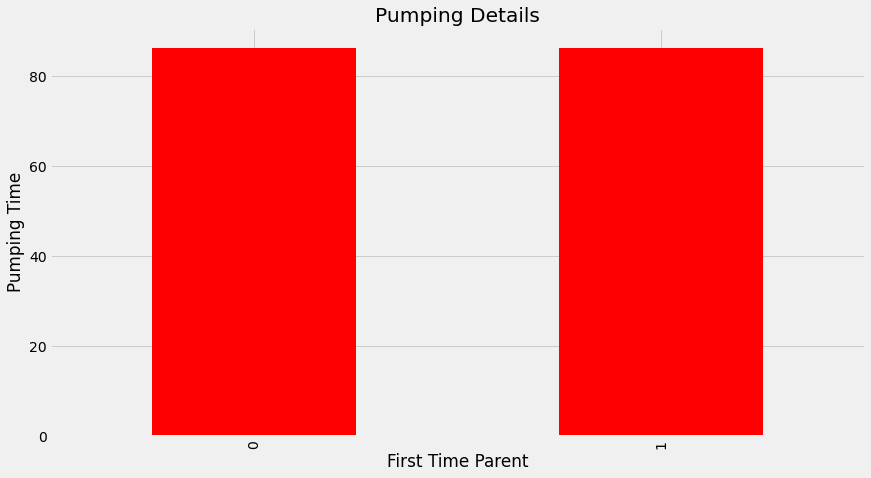

In [29]:
plt.figure(figsize=(13,7))
plt.style.use('fivethirtyeight')
AVT.plot.bar(color='r')
plt.ticklabel_format(style='plain',axis='y')
plt.title('Pumping Details')
plt.xlabel('First Time Parent')
plt.ylabel('Pumping Time');

#### There is no significant difference in pumping time whether its first time parent or not

### Top10 Babies who cried most

In [30]:
CS=df.groupby(['BabyId'])['Crying seconds']
cs=CS.head(10)
cs=cs.sort_values(ascending=False)

In [31]:
cs

1726    900.0
542     900.0
693     900.0
692     900.0
691     900.0
        ...  
825      57.0
827      56.0
826      48.0
820      43.0
823      25.0
Name: Crying seconds, Length: 170, dtype: float64

In [32]:
cs1=cs.head(10)

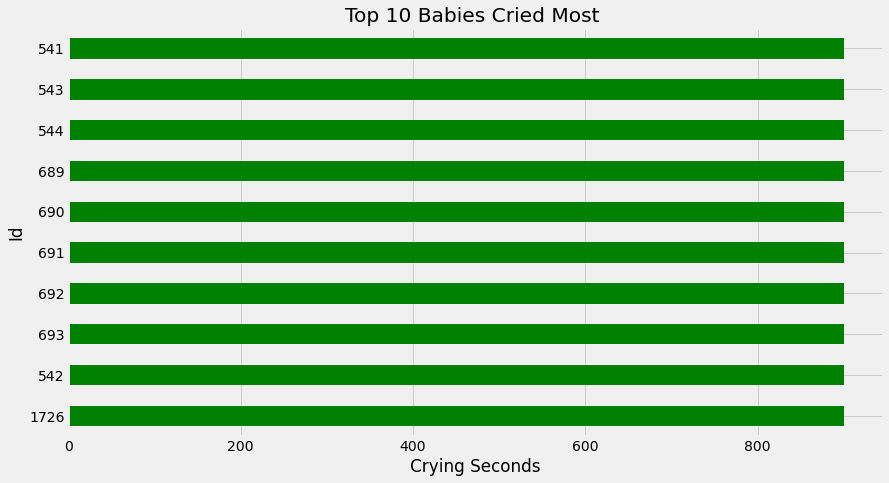

In [33]:
plt.figure(figsize=(13,7))
plt.style.use('fivethirtyeight')
cs1.plot.barh(color='g')
plt.title('Top 10 Babies Cried Most ')
plt.xlabel('Crying Seconds')
plt.ylabel('Id');

#### So these are the top 10 babies who cried most.
#### Yenapova Medical College need to take extra care of these babies

### Top10 Babies Who Sleep Most

In [34]:
Ps=df.groupby(['BabyId'])['SleepingSecond']
ps=Ps.head(10)
ps=ps.sort_values()
ps1=ps.head(10)

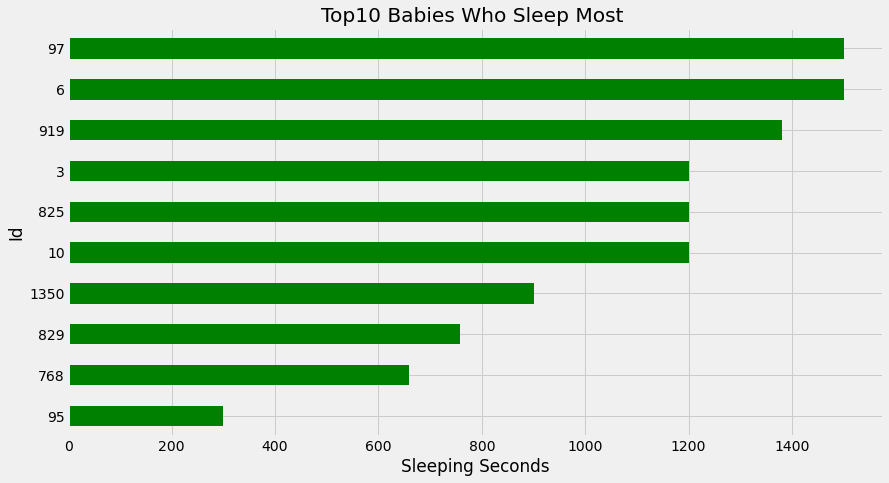

In [35]:
plt.figure(figsize=(13,7))
plt.style.use('fivethirtyeight')
ps1.plot.barh(color='g')
plt.title('Top10 Babies Who Sleep Most ')
plt.xlabel('Sleeping Seconds')
plt.ylabel('Id');

#### These are top 10 babies who sleep most
#### Seems like healthy babies among all

In [36]:
df["Crying year"]=df['Crying date'].dt.year
df["Crying month"]=df['Crying date'].dt.month
df["Crying day"]=df['Crying date'].dt.day

In [37]:
df.head()

,BabyId,FirsttimeParent,Crying date,Crying time,Crying seconds,Feeding date,Feeding time,Bottle amount,PumpingDate,PumpingTime,...,SleepingDate,SleepingTime,SleepingSecond,Sleeping_year,Sleeping_month,Sleeping_day,Total_pumping_time,Crying year,Crying month,Crying day
0,HPT2_NR_16,1,2015-08-05,20:31:47,900.0,2015-08-05,20:31:47,180.0,2015-08-05,20:31:47,...,2015-08-05,20:31:47,5153.979043,2015,8,5,70.000000,2015,8,5
1,HPT2_NR_16,1,2015-08-05,23:33:46,600.0,2015-08-05,23:33:46,180.0,2015-08-05,23:33:46,...,2015-08-05,23:33:46,33365.111960,2015,8,5,85.000000,2015,8,5
3,HPT2_NR_16,1,2015-08-06,11:30:00,300.0,2015-08-06,11:30:00,35.0,2015-08-06,11:30:00,...,2015-08-06,11:30:00,1200.000000,2015,8,6,86.375362,2015,8,6
4,HPT2_NR_16,1,2015-08-06,12:15:00,600.0,2015-08-06,12:15:00,180.0,2015-08-06,12:15:00,...,2015-08-06,12:15:00,4800.000000,2015,8,6,86.375362,2015,8,6
5,HPT2_NR_16,1,2015-08-06,17:45:00,900.0,2015-08-06,17:45:00,180.0,2015-08-06,17:45:00,...,2015-08-06,17:45:00,2100.000000,2015,8,6,86.375362,2015,8,6


In [38]:
df[['Sleeping_hr','Sleeping_min','Sleeping_sec']]=pd.DataFrame([(x.hour,x.minute,x.second)for x in df['SleepingTime']])

In [39]:
df.head()

,BabyId,FirsttimeParent,Crying date,Crying time,Crying seconds,Feeding date,Feeding time,Bottle amount,PumpingDate,PumpingTime,...,Sleeping_year,Sleeping_month,Sleeping_day,Total_pumping_time,Crying year,Crying month,Crying day,Sleeping_hr,Sleeping_min,Sleeping_sec
0,HPT2_NR_16,1,2015-08-05,20:31:47,900.0,2015-08-05,20:31:47,180.0,2015-08-05,20:31:47,...,2015,8,5,70.000000,2015,8,5,20.0,31.0,47.0
1,HPT2_NR_16,1,2015-08-05,23:33:46,600.0,2015-08-05,23:33:46,180.0,2015-08-05,23:33:46,...,2015,8,5,85.000000,2015,8,5,23.0,33.0,46.0
3,HPT2_NR_16,1,2015-08-06,11:30:00,300.0,2015-08-06,11:30:00,35.0,2015-08-06,11:30:00,...,2015,8,6,86.375362,2015,8,6,12.0,15.0,0.0
4,HPT2_NR_16,1,2015-08-06,12:15:00,600.0,2015-08-06,12:15:00,180.0,2015-08-06,12:15:00,...,2015,8,6,86.375362,2015,8,6,17.0,45.0,0.0
5,HPT2_NR_16,1,2015-08-06,17:45:00,900.0,2015-08-06,17:45:00,180.0,2015-08-06,17:45:00,...,2015,8,6,86.375362,2015,8,6,19.0,20.0,0.0


### Hours-Wise Sleeping Details

In [40]:
Sh=df.groupby(['Sleeping_hr'])['SleepingSecond'].sum()

In [41]:
Sh

Sleeping_hr
0.0     2.551936e+05
1.0     3.191427e+05
2.0     2.615436e+05
3.0     4.258127e+05
4.0     4.788939e+05
5.0     5.494684e+05
6.0     6.799742e+05
7.0     1.088232e+06
8.0     7.881619e+05
9.0     7.165186e+05
10.0    9.925109e+05
11.0    1.131946e+06
12.0    7.342584e+05
13.0    6.982191e+05
14.0    7.737295e+05
15.0    6.356976e+05
16.0    7.153551e+05
17.0    8.650882e+05
18.0    7.415815e+05
19.0    8.966936e+05
20.0    8.495877e+05
21.0    7.651277e+05
22.0    5.366528e+05
23.0    9.418444e+05
Name: SleepingSecond, dtype: float64

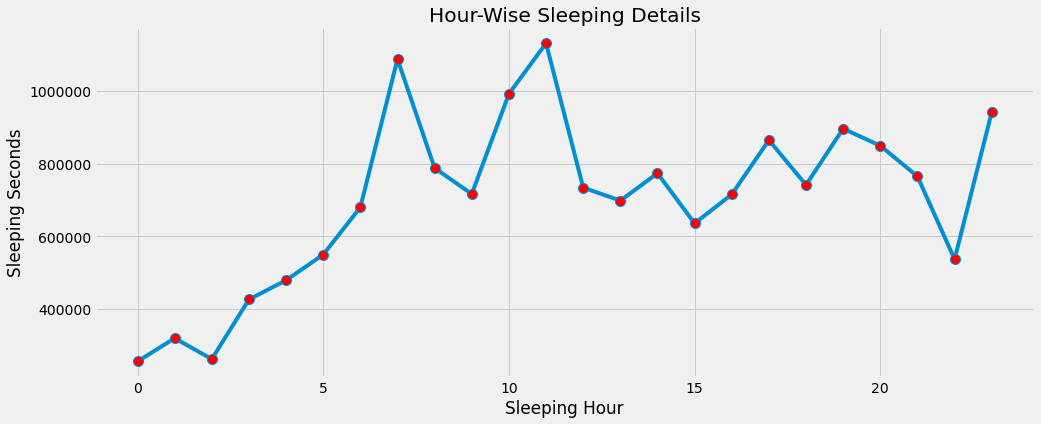

In [42]:
plt.subplots(figsize=(15,6))
plt.style.use('fivethirtyeight')
Sh.plot.line(marker='o',markerfacecolor='r',markersize=10)
plt.ticklabel_format(style='plain',axis='y')
plt.xlabel('Sleeping Hour')
plt.ylabel('Sleeping Seconds')
plt.title('Hour-Wise Sleeping Details');

#### Between 7 to 12 Babies sleep most
#### Between 1 to 5 Babies sleep less

### Hour-Wise Feeding Details

In [43]:
df[['Feeding_hr','Feeding_min','Feeding_sec']]=pd.DataFrame([(x.hour,x.minute,x.second)for x in df['Feeding time']])

In [44]:
df.head()

,BabyId,FirsttimeParent,Crying date,Crying time,Crying seconds,Feeding date,Feeding time,Bottle amount,PumpingDate,PumpingTime,...,Total_pumping_time,Crying year,Crying month,Crying day,Sleeping_hr,Sleeping_min,Sleeping_sec,Feeding_hr,Feeding_min,Feeding_sec
0,HPT2_NR_16,1,2015-08-05,20:31:47,900.0,2015-08-05,20:31:47,180.0,2015-08-05,20:31:47,...,70.000000,2015,8,5,20.0,31.0,47.0,20.0,31.0,47.0
1,HPT2_NR_16,1,2015-08-05,23:33:46,600.0,2015-08-05,23:33:46,180.0,2015-08-05,23:33:46,...,85.000000,2015,8,5,23.0,33.0,46.0,23.0,33.0,46.0
3,HPT2_NR_16,1,2015-08-06,11:30:00,300.0,2015-08-06,11:30:00,35.0,2015-08-06,11:30:00,...,86.375362,2015,8,6,12.0,15.0,0.0,12.0,15.0,0.0
4,HPT2_NR_16,1,2015-08-06,12:15:00,600.0,2015-08-06,12:15:00,180.0,2015-08-06,12:15:00,...,86.375362,2015,8,6,17.0,45.0,0.0,17.0,45.0,0.0
5,HPT2_NR_16,1,2015-08-06,17:45:00,900.0,2015-08-06,17:45:00,180.0,2015-08-06,17:45:00,...,86.375362,2015,8,6,19.0,20.0,0.0,19.0,20.0,0.0


In [45]:
fd=df.groupby(['Feeding_hr'])['Bottle amount'].sum()

In [46]:
fd

Feeding_hr
0.0      3695.0
1.0      3185.0
2.0      2485.0
3.0      5035.0
4.0      6030.0
5.0      5975.0
6.0      7260.0
7.0     10640.0
8.0      8580.0
9.0      7060.0
10.0    11075.0
11.0    11635.0
12.0     8995.0
13.0     8590.0
14.0    10605.0
15.0     8595.0
16.0     8780.0
17.0    10540.0
18.0    10280.0
19.0    10935.0
20.0     9990.0
21.0     9545.0
22.0     6825.0
23.0    12250.0
Name: Bottle amount, dtype: float64

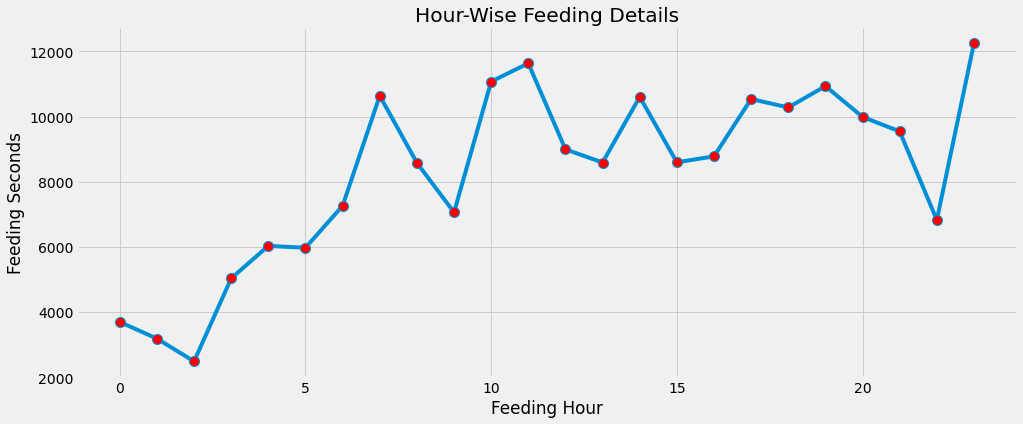

In [47]:
plt.subplots(figsize=(15,6))
plt.style.use('fivethirtyeight')
fd.plot.line(marker='o',markerfacecolor='r',markersize=10)
plt.ticklabel_format(style='plain',axis='y')
plt.xlabel('Feeding Hour')
plt.ylabel('Feeding Seconds')
plt.title('Hour-Wise Feeding Details');

#### Mostly feeding details have been taken at 11 pm

### Pumping Details

In [48]:
Pmp=df['Pumping Left'].mean()

In [49]:
Pmp

48.38843325392506

In [50]:
pmpr=df['PumpingRight'].mean()

In [51]:
pmpr

37.94751157211721

### Average Pumping Time

In [52]:
df['Total_pumping_time'].mean()

86.33594482604322

### Month-Wise Sleeping Details

In [53]:
SD=df.groupby(['Sleeping_month'])['SleepingSecond'].sum()

In [54]:
SD

Sleeping_month
7    2.854888e+06
8    1.434277e+07
9    6.927432e+04
Name: SleepingSecond, dtype: float64

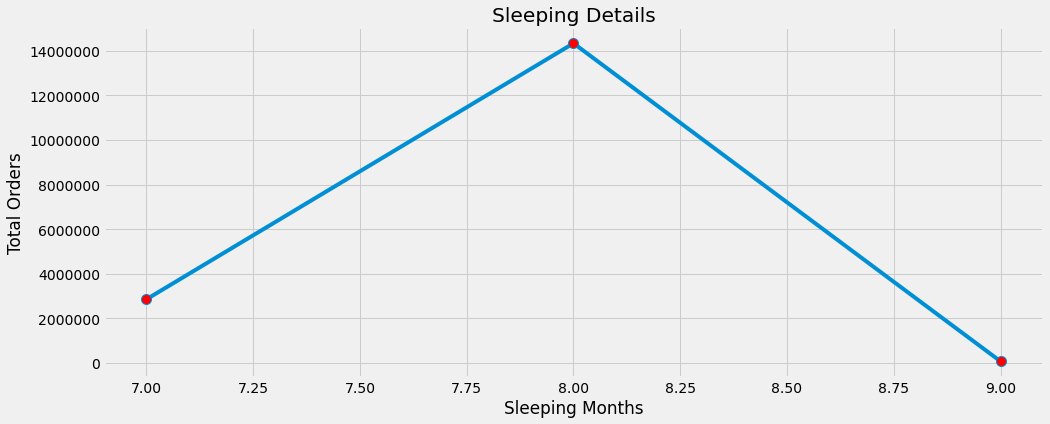

In [55]:
plt.subplots(figsize=(15,6))
plt.style.use('fivethirtyeight')
SD.plot.line(marker='o',markerfacecolor='r',markersize=10)
plt.ticklabel_format(style='plain',axis='y')
plt.xlabel('Sleeping Months')
plt.ylabel('Total Orders')
plt.title('Sleeping Details');

### Month-Wise Crying Details

In [56]:
CD=df.groupby(['Crying month'])['Crying seconds'].sum() 

In [57]:
CD

Crying month
7    2.390400e+05
8    1.301860e+06
9    6.300000e+03
Name: Crying seconds, dtype: float64

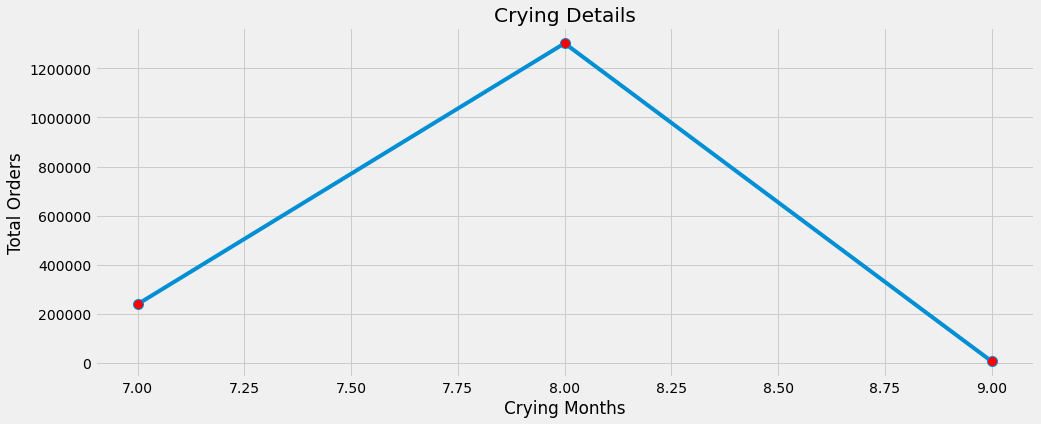

In [58]:
plt.subplots(figsize=(15,6))
plt.style.use('fivethirtyeight')
CD.plot.line(marker='o',markerfacecolor='r',markersize=10)
plt.ticklabel_format(style='plain',axis='y')
plt.xlabel('Crying Months')
plt.ylabel('Total Orders')
plt.title('Crying Details');

In [59]:
df["Feeding Year"]=df['Feeding date'].dt.year
df["Feeding Month"]=df['Feeding date'].dt.month
df["Feeding Day"]=df['Feeding date'].dt.day

In [60]:
df.head()

,BabyId,FirsttimeParent,Crying date,Crying time,Crying seconds,Feeding date,Feeding time,Bottle amount,PumpingDate,PumpingTime,...,Crying day,Sleeping_hr,Sleeping_min,Sleeping_sec,Feeding_hr,Feeding_min,Feeding_sec,Feeding Year,Feeding Month,Feeding Day
0,HPT2_NR_16,1,2015-08-05,20:31:47,900.0,2015-08-05,20:31:47,180.0,2015-08-05,20:31:47,...,5,20.0,31.0,47.0,20.0,31.0,47.0,2015,8,5
1,HPT2_NR_16,1,2015-08-05,23:33:46,600.0,2015-08-05,23:33:46,180.0,2015-08-05,23:33:46,...,5,23.0,33.0,46.0,23.0,33.0,46.0,2015,8,5
3,HPT2_NR_16,1,2015-08-06,11:30:00,300.0,2015-08-06,11:30:00,35.0,2015-08-06,11:30:00,...,6,12.0,15.0,0.0,12.0,15.0,0.0,2015,8,6
4,HPT2_NR_16,1,2015-08-06,12:15:00,600.0,2015-08-06,12:15:00,180.0,2015-08-06,12:15:00,...,6,17.0,45.0,0.0,17.0,45.0,0.0,2015,8,6
5,HPT2_NR_16,1,2015-08-06,17:45:00,900.0,2015-08-06,17:45:00,180.0,2015-08-06,17:45:00,...,6,19.0,20.0,0.0,19.0,20.0,0.0,2015,8,6


### Day-Wise Feeding Details

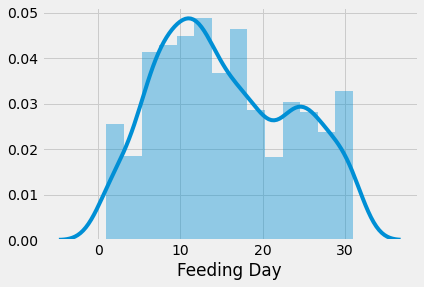

In [61]:
sns.distplot(df['Feeding Day']);

### 2. Birth.xlsx 
##### - Build a data pipeline to clean the data, perform statistical analysis and build regression model to understand relation between mother (age,weight and height) and baby’s weight 
##### - Evaluate the model’s performance and interpret the result. 

### Importing Dataset

In [62]:
data=pd.read_excel('birth.xlsx')

In [63]:
data.head()

,Mom_weight,Mom_height,Mom_Age,Religion,Gender,Birth_Weight
0,41,152,25,1,1,2.06
1,42,157,25,3,1,1.70
2,44,153,23,2,1,1.59
3,45,177,19,2,1,2.73
4,46,160,19,2,1,2.08


### Analysing Dataset

In [64]:
data.shape

(189, 6)

In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189 entries, 0 to 188
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Mom_weight    189 non-null    int64  
 1   Mom_height    189 non-null    int64  
 2   Mom_Age       189 non-null    int64  
 3   Religion      189 non-null    int64  
 4   Gender        189 non-null    int64  
 5   Birth_Weight  189 non-null    float64
dtypes: float64(1), int64(5)
memory usage: 9.0 KB


#### Dataset is clean 

In [66]:
data.describe()

,Mom_weight,Mom_height,Mom_Age,Religion,Gender,Birth_Weight
count,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000
mean,65.089947,172.026455,23.238095,1.793651,1.232804,2.936508
std,9.966826,8.978363,5.298678,0.808704,0.423741,0.645921
min,41.000000,151.000000,14.000000,1.000000,1.000000,1.500000
25%,59.000000,166.000000,19.000000,1.000000,1.000000,2.440000
50%,69.000000,174.000000,23.000000,2.000000,1.000000,2.980000
75%,73.000000,178.000000,26.000000,2.000000,1.000000,3.440000
max,79.000000,189.000000,45.000000,3.000000,2.000000,4.150000


### Checking Relationship Between Dependent & Independent Variables

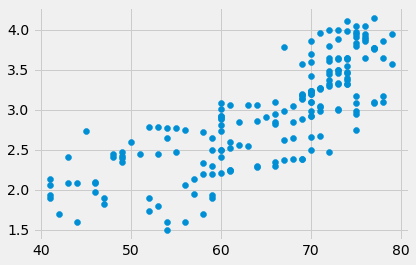

In [67]:
plt.scatter('Mom_weight','Birth_Weight', data=data);

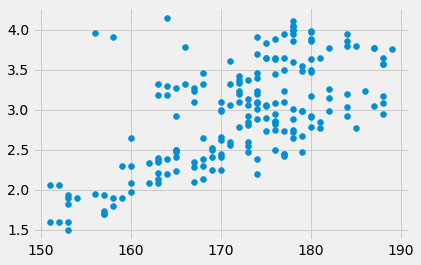

In [68]:
plt.scatter('Mom_height','Birth_Weight', data=data);

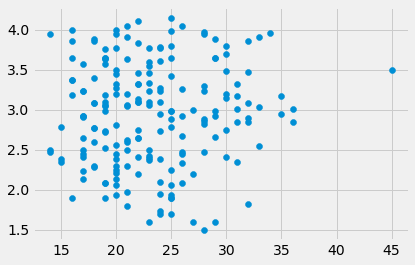

In [69]:
plt.scatter('Mom_Age','Birth_Weight', data=data);

### Checking Correlation Between Variables

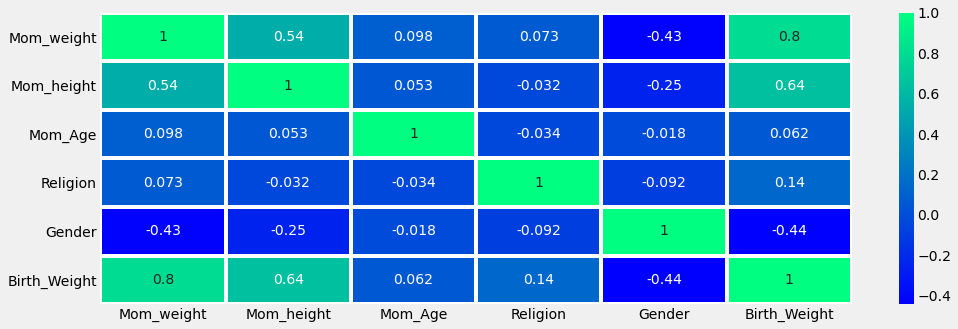

In [70]:
plt.figure(figsize=(15,5))
sns.heatmap(data.corr(),annot=True,linewidths=3,cmap='winter');

#### There Is Positive Correlation Between All Dependent & Independent Variable.

### Linear Regression

In [71]:
X = data.drop(['Birth_Weight','Religion','Gender'], axis=1)
Y= data.drop(['Mom_weight','Mom_height','Mom_Age','Religion','Gender'], axis=1)

In [72]:
X.head()

,Mom_weight,Mom_height,Mom_Age
0,41,152,25
1,42,157,25
2,44,153,23
3,45,177,19
4,46,160,19


In [73]:
Y.head()

,Birth_Weight
0,2.06
1,1.70
2,1.59
3,2.73
4,2.08


### Training The Data

In [74]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [75]:
X_train.shape

(151, 3)

In [76]:
X_test.shape

(38, 3)

### Model Building

In [77]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression()

In [78]:
regressor.coef_

array([[ 0.04132573,  0.02399245, -0.00332926]])

In [79]:
regressor.intercept_

array([-3.79010699])

In [80]:
Y_test

,Birth_Weight
108,3.77
74,3.80
161,2.21
95,3.17
123,3.63
71,3.27
18,2.75
124,3.64
143,2.08
7,1.90


In [81]:
Y_pred = regressor.predict(X_test)

In [82]:
Y_pred

array([[3.80198987],
       [3.52407151],
       [2.53362135],
       [3.51144018],
       [3.42741274],
       [3.08417423],
       [2.72154666],
       [3.4074372 ],
       [1.85243407],
       [1.76380848],
       [2.03771385],
       [3.3521081 ],
       [2.22837997],
       [2.80821242],
       [3.08486254],
       [3.92195081],
       [2.85952723],
       [3.14616447],
       [3.02688857],
       [3.8632918 ],
       [3.31411162],
       [3.51006486],
       [3.42408545],
       [2.91622839],
       [3.15810945],
       [2.12104971],
       [3.02953147],
       [3.41742759],
       [2.77364769],
       [2.80821373],
       [1.88641298],
       [3.32478705],
       [3.52074029],
       [2.89419184],
       [3.17681805],
       [2.62224564],
       [2.81291372],
       [1.65579186]])

### Checking Accuracy

In [83]:
from sklearn import metrics
print("Mean Absolute Error:", metrics.mean_absolute_error(Y_test, Y_pred))
print("Mean Squared Error:", metrics.mean_squared_error(Y_test, Y_pred))
print("Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))

Mean Absolute Error: 0.3012015900454579
Mean Squared Error: 0.13585420364180192
Root Mean Squared Error: 0.36858405234329106


In [84]:
from sklearn.metrics import r2_score
print("R2 Error:", metrics.r2_score(Y_test, Y_pred))

R2 Error: 0.6586352087291891


### Linear Regression
#### (Changing Testing Size Of Data)

In [85]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [86]:
X_train.shape

(132, 3)

In [87]:
X_test.shape

(57, 3)

In [88]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression()

In [89]:
Y_pred = regressor.predict(X_test)

In [90]:
from sklearn import metrics
print("Mean Absolute Error:", metrics.mean_absolute_error(Y_test, Y_pred))
print("Mean Squared Error:", metrics.mean_squared_error(Y_test, Y_pred))
print("Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))

Mean Absolute Error: 0.3066702090703291
Mean Squared Error: 0.14986230186326727
Root Mean Squared Error: 0.387120526274786


In [91]:
from sklearn.metrics import r2_score
print("R2 Error:", metrics.r2_score(Y_test, Y_pred))

R2 Error: 0.6439285658627285





### Random Forest

In [92]:
from sklearn.model_selection import train_test_split  
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.50, random_state=0)


from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=20, random_state=0)  
regressor.fit(X_train, Y_train)  
Y_pred = regressor.predict(X_test)  


from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))

Mean Absolute Error: 0.3004578947368421
Mean Squared Error: 0.16415208377192977
Root Mean Squared Error: 0.4051568631677486


In [93]:
from sklearn.metrics import r2_score
print("R2 Error:", metrics.r2_score(Y_test, Y_pred))

R2 Error: 0.6115544194043825


### Random Forest
#### (Changing No. Of Estimators)

In [94]:
from sklearn.model_selection import train_test_split  
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.50, random_state=0)


from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=50, random_state=0)  
regressor.fit(X_train, Y_train)  
Y_pred = regressor.predict(X_test)  


from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))

Mean Absolute Error: 0.2906431578947367
Mean Squared Error: 0.154116980128655
Root Mean Squared Error: 0.3925773555984285


In [95]:
from sklearn.metrics import r2_score
print("R2 Error:", metrics.r2_score(Y_test, Y_pred))

R2 Error: 0.6353012496088959







#### From above all model we choose Random Forest Model which has less MAE among all models.






## THANK YOU